In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
crime_df = pd.read_csv("Crimes_-_2010_to_2023.csv")
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [28]:
print(crime_df.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Logitude ',
       'Location'],
      dtype='object')


In [29]:
crime_df.drop(['Case Number', 'IUCR', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Location'], axis=1, inplace=True)
crime_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Logitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254343,13546357,7/29/24 14:50,079XX S CICERO AVE,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,18.0,2024,8/6/24 15:40,41.748060,-87.741303
254344,13551304,7/29/24 12:00,017XX W COLUMBIA AVE,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,49.0,2024,8/6/24 15:40,42.004380,-87.674446
254345,13546005,7/29/24 1:00,051XX S INDIANA AVE,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,3.0,2024,8/6/24 15:40,41.801297,-87.621007
254346,13552326,7/24/24 16:00,087XX S BEVERLY AVE,THEFT,OVER $500,APARTMENT,False,False,19.0,2024,8/6/24 15:40,41.734732,-87.671948


In [36]:
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6)
print(top_6_primary_types)

Primary Type
THEFT                  55862
BATTERY                42224
CRIMINAL DAMAGE        26437
MOTOR VEHICLE THEFT    22352
ASSAULT                21563
DECEPTIVE PRACTICE     17606
Name: count, dtype: int64


In [37]:
ward_crime_counts = crime_df['Ward'].value_counts()
most_affected_wards = ward_crime_counts.head()
least_affected_wards = ward_crime_counts.tail()

print("Most Affected Wards:")
print(most_affected_wards)

print("\nLeast Affected Wards:")
print(least_affected_wards)

Most Affected Wards:
Ward
27.0    11585
28.0    11296
6.0      9569
24.0     8755
20.0     8206
Name: count, dtype: int64

Least Affected Wards:
Ward
39.0    2603
47.0    2565
23.0    2549
19.0    2465
38.0    2186
Name: count, dtype: int64


In [49]:
# Calculate the crime counts per ward
ward_crime_counts = crime_df.groupby('Ward').size()

# Convert the index to a Series so that it can be correlated
ward_numeric = pd.Series(ward_crime_counts.index.astype(float))

# Calculate the correlation between ward number and crime counts
correlation = ward_numeric.corr(ward_crime_counts)

print(f"Correlation between Ward and Crime Incidence: {correlation}")


Correlation between Ward and Crime Incidence: -0.3210497227960682


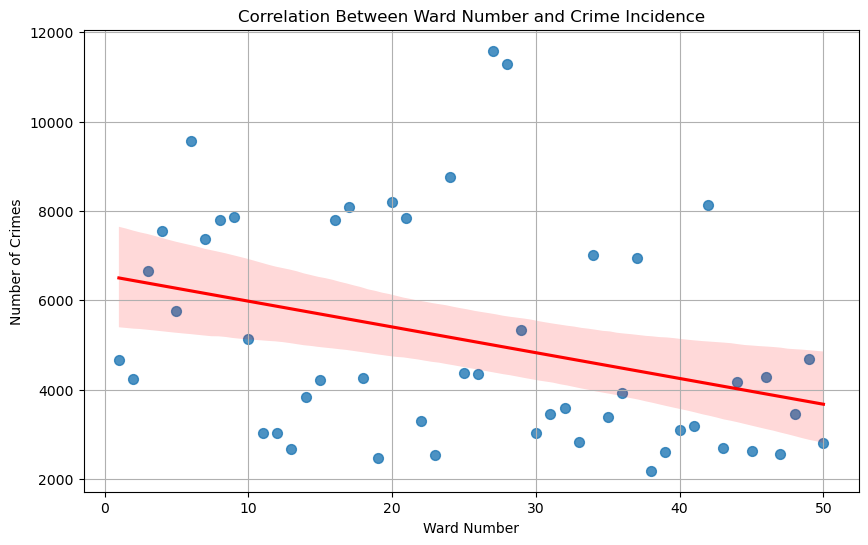

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=ward_numeric, y=ward_crime_counts, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Correlation Between Ward Number and Crime Incidence')
plt.xlabel('Ward Number')
plt.ylabel('Number of Crimes')

# Display the plot
plt.grid(True)
plt.show()

In [42]:
location_crime_counts = crime_df['Location Description'].value_counts()
top_location_types = location_crime_counts.head(10)
bottom_location_types = location_crime_counts[location_crime_counts > 0].tail(10)
print("Top 10 Location Types with the Highest Crime Rates:")
print("Top 10 Location Types with the Lowest Crime Rates:")
print(top_location_types)
print(bottom_location_types)

Top 10 Location Types with the Highest Crime Rates:
Top 10 Location Types with the Lowest Crime Rates:
Location Description
STREET                                    71554
APARTMENT                                 47586
RESIDENCE                                 30349
SIDEWALK                                  12661
PARKING LOT / GARAGE (NON RESIDENTIAL)     8339
SMALL RETAIL STORE                         8270
ALLEY                                      6132
RESTAURANT                                 5686
DEPARTMENT STORE                           4864
OTHER (SPECIFY)                            4043
Name: count, dtype: int64
Location Description
RIVER                           1
CHURCH PROPERTY                 1
EXPRESSWAY EMBANKMENT           1
PUBLIC GRAMMAR SCHOOL           1
POLICE FACILITY                 1
BANQUET HALL                    1
PUBLIC HIGH SCHOOL              1
YMCA                            1
POOLROOM                        1
GOVERNMENT BUILDING/PROPERTY    1
Name: cou

<Figure size 1400x800 with 0 Axes>

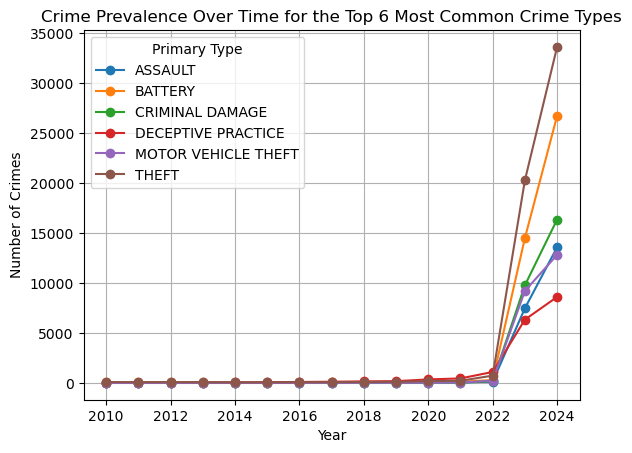

In [44]:
# Ensure that the 'Date' column is in datetime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Identify the top 6 most common 'Primary Type' values
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

# Filter the data for only the top 6 most common crime types
top_crimes_df = crime_df[crime_df['Primary Type'].isin(top_6_primary_types)]

# Group by 'Year' and 'Primary Type' and count the number of crimes
crime_trend = top_crimes_df.groupby(['Year', 'Primary Type']).size().unstack()

# Plot the trends over time for the top 6 crime types
plt.figure(figsize=(14, 8))
crime_trend.plot(kind='line', marker='o')

# Add title and labels
plt.title('Crime Prevalence Over Time for the Top 6 Most Common Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type')
plt.grid(True)

# Display the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

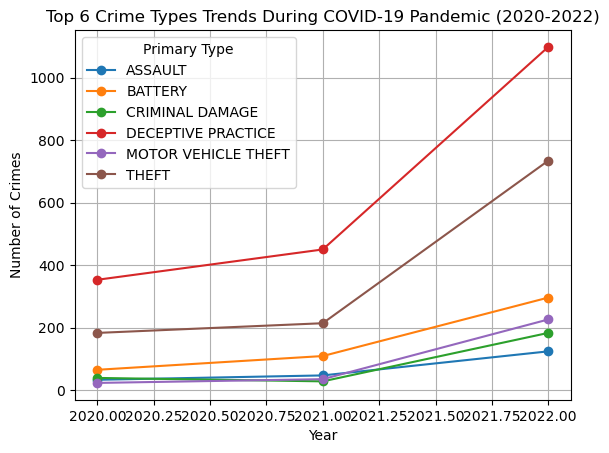

In [45]:
# Ensure that the 'Date' column is in datetime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Identify the top 6 most common 'Primary Type' values
top_6_primary_types = crime_df['Primary Type'].value_counts().head(6).index

# Filter the data for only the top 6 most common crime types and for the years 2020-2022
pandemic_crimes_df = crime_df[(crime_df['Primary Type'].isin(top_6_primary_types)) &
                              (crime_df['Year'].isin([2020, 2021, 2022]))]

# Group by 'Year' and 'Primary Type' and count the number of crimes
pandemic_crime_trend = pandemic_crimes_df.groupby(['Year', 'Primary Type']).size().unstack()

# Plot the trends over time for the top 6 crime types during the pandemic years
plt.figure(figsize=(14, 8))
pandemic_crime_trend.plot(kind='line', marker='o')

# Add title and labels
plt.title('Top 6 Crime Types Trends During COVID-19 Pandemic (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type')
plt.grid(True)

# Display the plot
plt.show()


Year
2010    37.482900
2011    36.903039
2012    38.188976
2013    34.313725
2014    33.753501
2015    32.971014
2016    29.326513
2017    24.818841
2018    27.154047
2019    22.552783
2020    24.365482
2021    25.649203
2022    16.454566
2023    12.378765
2024    13.203794
dtype: float64


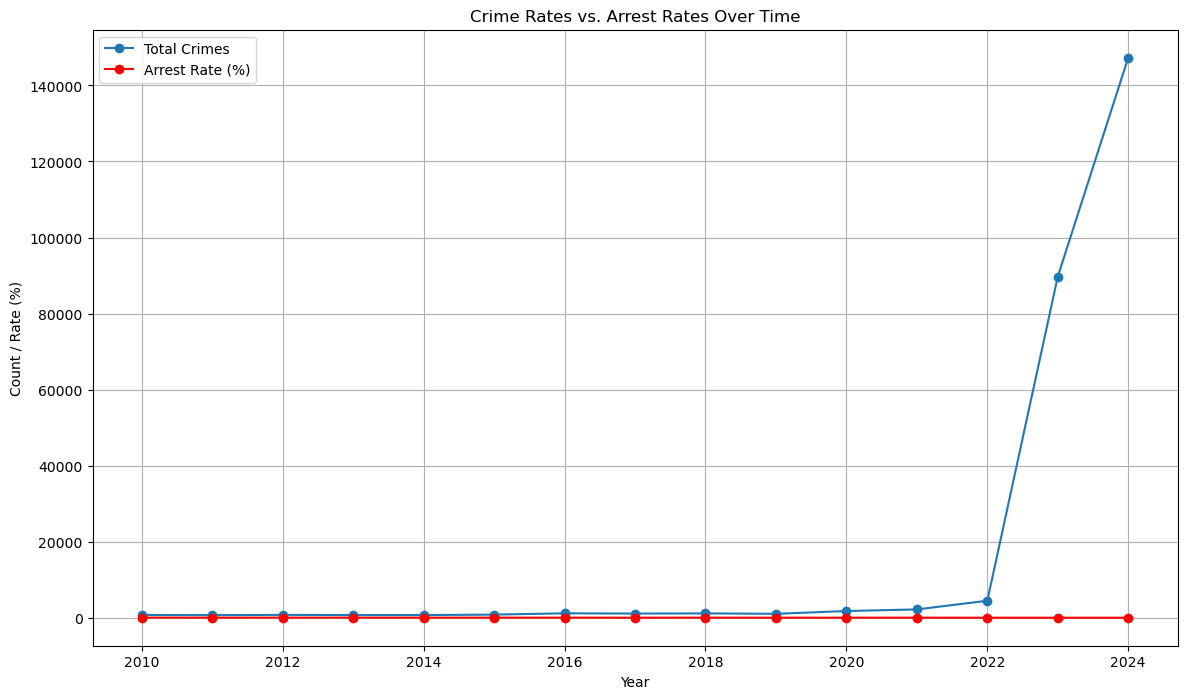

In [46]:
# Ensure that the 'Date' column is in datetime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Calculate the total number of crimes per year
total_crimes_per_year = crime_df.groupby('Year').size()

# Calculate the total number of arrests per year
total_arrests_per_year = crime_df[crime_df['Arrest'] == True].groupby('Year').size()

# Calculate the arrest rate per year
arrest_rate_per_year = (total_arrests_per_year / total_crimes_per_year) * 100

# Display the arrest rate
print(arrest_rate_per_year)

# Plot crime rates and arrest rates over time
plt.figure(figsize=(14, 8))

# Plot total crimes
total_crimes_per_year.plot(kind='line', marker='o', label='Total Crimes')

# Plot arrest rates
arrest_rate_per_year.plot(kind='line', marker='o', color='red', label='Arrest Rate (%)')

# Add title and labels
plt.title('Crime Rates vs. Arrest Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Count / Rate (%)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [58]:
import pandas as pd

# Ensure that the 'Date' column is in datetime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
crime_df['Year'] = crime_df['Date'].dt.year

# Group by 'Year' and count the number of crimes per year
crimes_per_year = crime_df.groupby('Year').count()

# Display the number of crimes committed each year
crimes_per_year

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Logitude,Location
Year,,,,,,,,,,,,,,,,,,,,,
2010,731,731,731,731,731,731,731,726,731,731,...,731,730,731,731,669,669,731,669,669,669
2011,691,691,691,691,691,691,691,683,691,691,...,691,690,691,691,628,628,691,628,628,628
2012,762,762,762,762,762,762,762,758,762,762,...,762,762,762,762,704,704,762,704,704,704
2013,714,714,714,714,714,714,714,698,714,714,...,714,714,714,714,634,634,714,634,634,634
2014,714,714,714,714,714,714,714,691,714,714,...,714,714,714,714,591,591,714,591,591,591
2015,828,828,828,828,828,828,828,813,828,828,...,828,828,828,828,658,658,828,658,658,658
2016,1173,1173,1173,1173,1173,1173,1173,1139,1173,1173,...,1173,1173,1173,1173,982,982,1173,982,982,982
2017,1104,1104,1104,1104,1104,1104,1104,1057,1104,1104,...,1104,1104,1104,1104,895,895,1104,895,895,895
2018,1149,1149,1149,1149,1149,1149,1149,1111,1149,1149,...,1149,1149,1149,1149,823,823,1149,823,823,823


Year
2010       731
2011       691
2012       762
2013       714
2014       714
2015       828
2016      1173
2017      1104
2018      1149
2019      1042
2020      1773
2021      2195
2022      4479
2023     89702
2024    147291
dtype: int64